In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
image = mpimg.imread('test_images/solidWhiteCurve.jpg')
ysize = image.shape[0]
xsize = image.shape[1]
print(ysize, xsize)

540 960


In [3]:
color_select = np.copy(image)
line_image = np.copy(image)

red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold ,green_threshold ,blue_threshold]

left_bottom = [120,540]
right_bottom = [900,540]
apex = [480,300]

In [4]:
color_threshold = (image[:,:,0] < rgb_threshold[0])\
|(image[:,:,1] < rgb_threshold[1])\
|(image[:,:,2] < rgb_threshold[2])

fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

XX,YY = np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))
region_threshold = (YY > (XX*fit_left[0] + fit_left[1])) &\
(YY > (XX*fit_right[0] + fit_right[1])) &\
(YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [5]:
color_select[color_threshold] = [0,0,0]
line_image[~color_threshold & region_threshold] = [255,0,0]

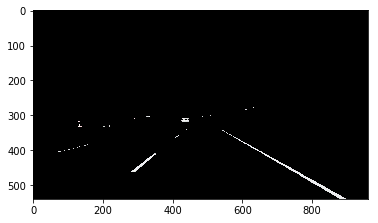

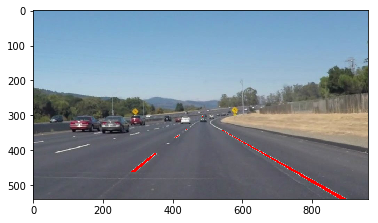

In [6]:
plt.imshow(color_select)
plt.show()
plt.imshow(line_image)
plt.show()